<a href="https://colab.research.google.com/github/ZainDataS/EDA_Global_terrorism/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** **Global Terrorism Analysis**

**Project Type** - EDA

**Contribution** - ZAIN ADIL

# **Project Summary -**

 The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Explore and analyze the data to discover key findings pertaining to terrorist activities.

# **GitHub Link -**

# **Problem Statement**

#### **Define Your Business Objective?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


# **Let's Begin !**

**Basic Overview**

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing and Observing the Data**

In [ ]:
file_path = '/content/drive/My Drive/AlmaBetter/CapstoneProject/EDA on Global Terrorism/Global Terrorism Data.csv'


The data string is of latin encoding instead of UTF-8 encoding.

In [ ]:
#reference - https://docs.python.org/3/library/codecs.html#standard-encodings
raw_data2 = pd.read_csv(file_path, encoding="ISO-8859–1")
print('Data successfully imported')
raw_data = raw_data2.copy()  #keeping the original copy separately

<ipython-input-4-613e376c366c>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data2 = pd.read_csv(file_path, encoding="ISO-8859–1")


Data successfully imported


In [ ]:
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
raw_data.shape

(181691, 135)

In [ ]:
raw_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## **Cleaning the Data**

In [ ]:
#viewing all the columns name so that only useful columns can be kept for further analysis
for i in raw_data.columns:
  print(i,end=',')


eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [ ]:
#making a dataset with only the useful columns and dropping the remaining columns
removed_col_df= raw_data[['iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','natlty1_txt','gname','weapdetail','nkill','nwound','propextent_txt']]

In [ ]:
removed_col_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weapdetail,nkill,nwound,propextent_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,United States,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosive,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,NaN


In [ ]:
#renaming the columns
renamed_df=removed_col_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','natlty1_txt':'Nationality','gname':'Group Name','weapdetail':'Weapon Type','nkill':'Killed','nwound':'Wounded','propextent_txt':'PropertyDamaged'})

In [ ]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   AttackType       181691 non-null  object 
 8   TargetType       181691 non-null  object 
 9   Nationality      180132 non-null  object 
 10  Group Name       181691 non-null  object 
 11  Weapon Type      114021 non-null  object 
 12  Killed           171378 non-null  float64
 13  Wounded          165380 non-null  float64
 14  PropertyDamaged  64065 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


In [ ]:
renamed_df.shape

(181691, 15)

**Replacing the Null value in 'Killed' and 'Wounded' and 'PropertyDamaged' column with 0(Zero).**

In [ ]:
renamed_df['Killed'].fillna('0',inplace=True)
renamed_df['Killed'].isnull().sum()

0

In [ ]:
renamed_df['Wounded'].fillna('0',inplace=True)
renamed_df['Wounded'].isnull().sum()

0

In [ ]:
renamed_df['PropertyDamaged'].fillna('0',inplace=True)
renamed_df['PropertyDamaged']= renamed_df['PropertyDamaged'].replace({'Unknown':0})
renamed_df['PropertyDamaged'].isnull().sum()

0

In [ ]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             181691 non-null  int64 
 1   Month            181691 non-null  int64 
 2   Day              181691 non-null  int64 
 3   Country          181691 non-null  object
 4   Region           181691 non-null  object
 5   provstate        181270 non-null  object
 6   city             181257 non-null  object
 7   AttackType       181691 non-null  object
 8   TargetType       181691 non-null  object
 9   Nationality      180132 non-null  object
 10  Group Name       181691 non-null  object
 11  Weapon Type      114021 non-null  object
 12  Killed           181691 non-null  object
 13  Wounded          181691 non-null  object
 14  PropertyDamaged  181691 non-null  object
dtypes: int64(3), object(12)
memory usage: 20.8+ MB


In [ ]:
#converting the NaN replaced column to int datatype
renamed_df= renamed_df.astype({'Killed':int,'Wounded':int})

In [ ]:
#checking the no of total null values present in different columns
df=renamed_df
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
provstate            421
city                 434
AttackType             0
TargetType             0
Nationality         1559
Group Name             0
Weapon Type        67670
Killed                 0
Wounded                0
PropertyDamaged        0
dtype: int64

In [ ]:
#creating a new col for total casualties by summing no of killed and no of wounded
df['Casualties']= df['Killed']+df['Wounded']

In [ ]:
df.describe()

,Year,Month,Day,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883291,5.150151
std,13.259430,3.388303,8.814045,11.227057,34.309746,40.555414
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


## **Observations from above Table:**
1. This dataset contains terrorist activities ranging from 1970 to 2017.

2. The maximum number of people killed in a single attack is 1570.

3. The maximum number of people wounded in a single attack is 8191.

4. The highest casualties in a single attack is 9574.

5. An average of more than 2 people were killed in each attack.

6. Similarly an average of approx 3 people got wounded in each attack.






In [ ]:
df.head()

,Year,Month,Day,Country,Region,provstate,city,AttackType,TargetType,Nationality,Group Name,Weapon Type,Killed,Wounded,PropertyDamaged,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,1,0,0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,0,0,0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,United States,Unknown,NaN,1,0,0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosive,0,0,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0,0,0,0


# **Visualizing the Data**

## 1.  No of attacks, Regionwise, Countrywise and City wise.

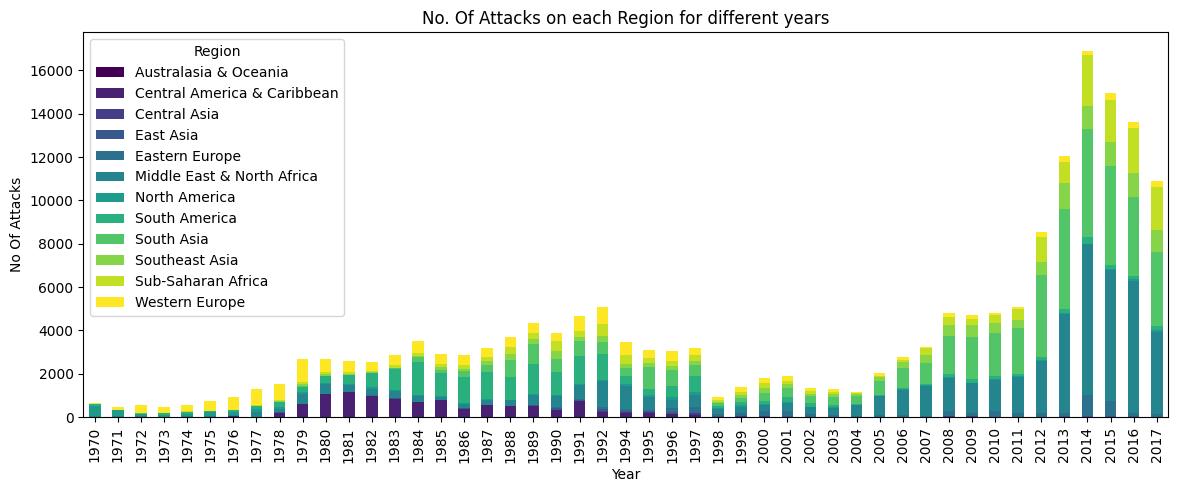

In [ ]:
# pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(12,5))
df.groupby(['Year','Region']).size().unstack().plot(kind='bar',stacked=True,figsize=(14,5),cmap='viridis',title='No. Of Attacks on each Region for different years')
plt.ylabel('No Of Attacks')
plt.show()

In [ ]:
country_df = df['Country'].value_counts()
country_df.head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [ ]:
#which city has the highest attack
city_df= df['city'][df['city']!='Unknown'].value_counts()
city_df.head(10)

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

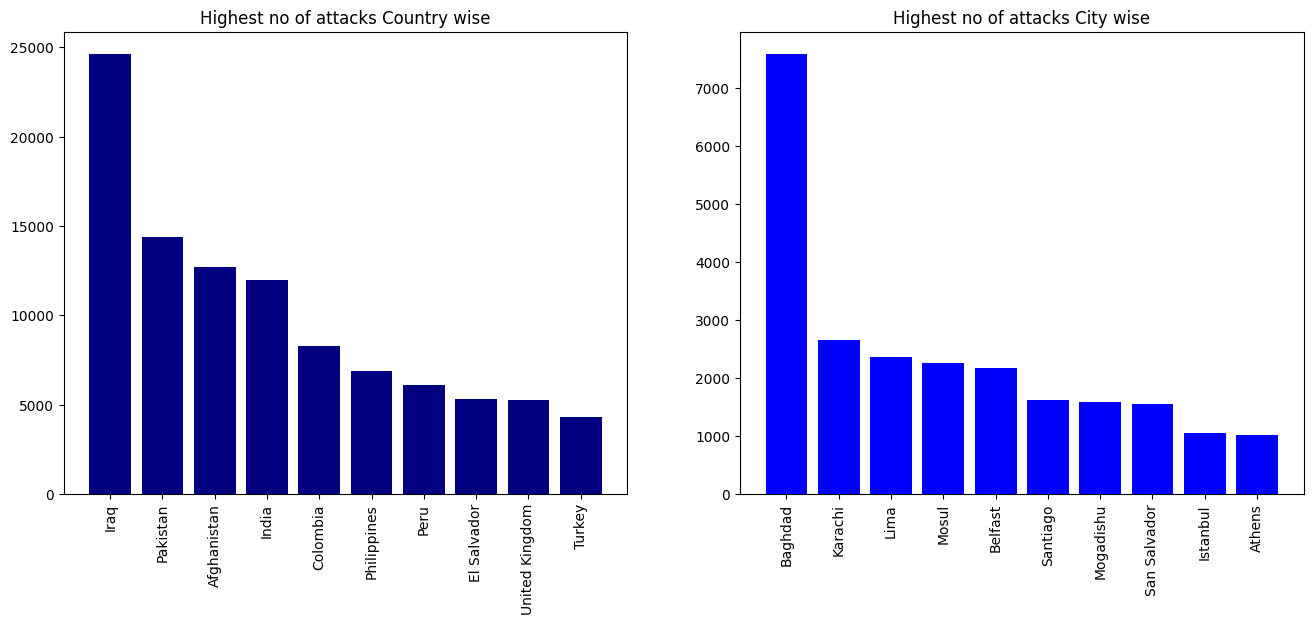

In [ ]:
label1 = ['Iraq','Pakistan','Afghanistan','India','Colombia','Philippines','Peru','El Salvador','United Kingdom','Turkey'] #labels for the country graph
label2 = ['Baghdad','Karachi','Lima','Mosul','Belfast','Santiago','Mogadishu','San Salvador','Istanbul','Athens'] #labels for the city graph

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

ax1.bar(label1, country_df.head(10), color="navy")
ax1.set_title("Highest no of attacks Country wise")
ax1.tick_params (axis='x', labelrotation=90)

ax2.bar(label2, city_df.head(10), color="blue")
ax2.set_title("Highest no of attacks City wise")
ax2.tick_params (axis='x', labelrotation=90)

plt.show()

## 2. Number of Attacks in each year

create heading type wise and under it include everything of one aspect(full region wise), then create another heading type and so on. In the end give an overall gist of the whole report.

print the whole sentence as output for the single output values like max no and min no.



In [ ]:
year_df = df['Year'].value_counts(sort=True).to_frame().reset_index().rename(columns={'index':'Year','Year':'No Of Attacks'}).set_index('Year')
year_df.head(10)

,No Of Attacks
Year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826


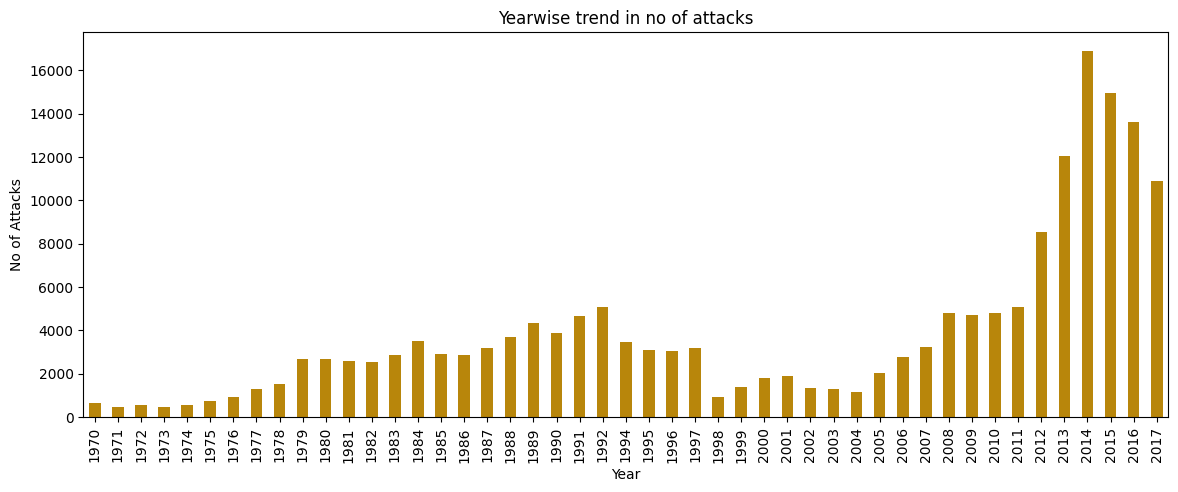

In [ ]:
year_df.sort_values(by=['Year']).plot(kind='bar',figsize=(14,5),color='darkgoldenrod', title='Yearwise trend in no of attacks',ylabel="No of Attacks",legend=None)
plt.show()

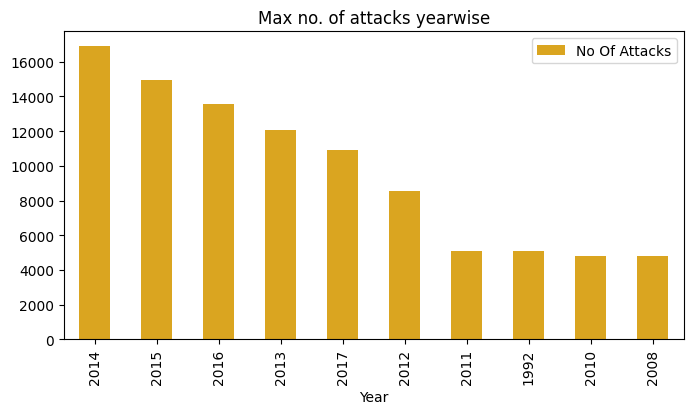

In [ ]:
year_df.head(10).plot(kind='bar',title='Max no. of attacks yearwise',color='goldenrod', figsize=(8,4))
plt.show()
#remove the label inside the graph

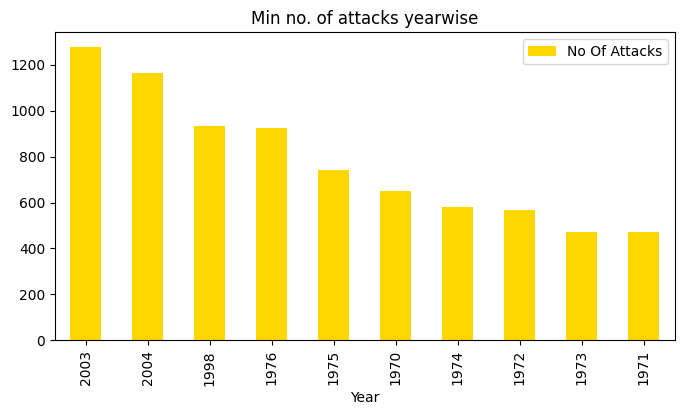

In [ ]:
year_df.sort_values(by=['No Of Attacks'],ascending=False).tail(10).plot(kind='bar',title='Min no. of attacks yearwise',color='gold',figsize=(8,4))
plt.show()

## **Observations from above Graphs:**

1. From 1970 to year 2004 there are lesser no of attacks and the no of attacks went up and down across different years.
2. From 2004 onwards there is a significant increase in the no of attacks which only decreased a little after peaking in 2014.  
3. Max no of attacks in a single year occured in 2014 which is more than 16000.
4. Minimum no of attacks in a single year occured in 1971 which is more than 400.




## 3. No of casualties accross the years.

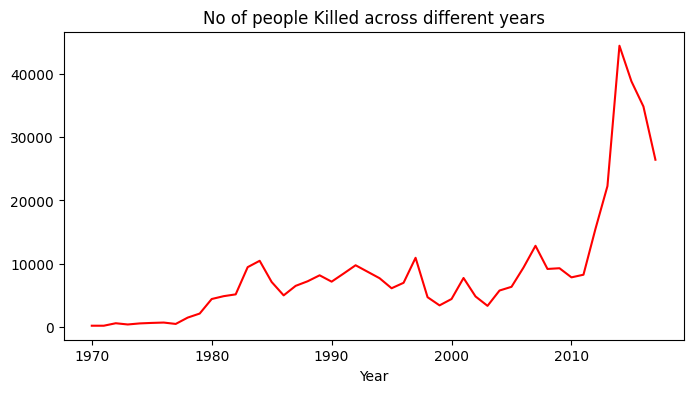

In [ ]:
nc=df[['Year','Killed']].groupby('Year').sum()
nc.plot(color='red',figsize=(8,4),title='No of people Killed across different years',legend=None)
plt.show()

In [ ]:
#try making an area chart
#nc=df[['Year','Killed']].groupby('Year').sum()
#plt.fill_between(nc,color='red',figsize=(8,4),title='No of people Killed across different years',legend=None)
#plt.show()

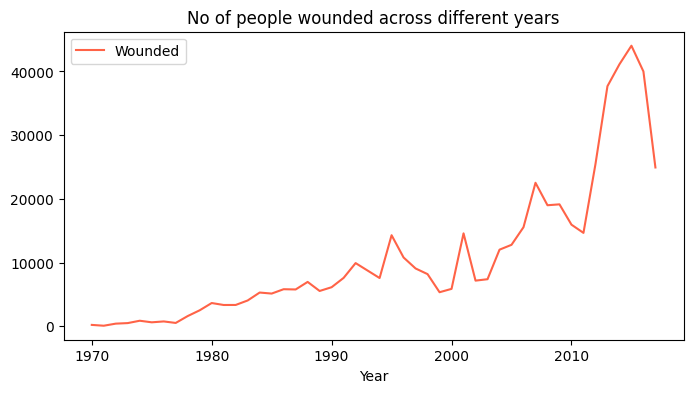

In [ ]:
nc=df[['Year','Wounded']].groupby('Year').sum()
nc.plot(color='tomato',figsize=(8,4),title='No of people wounded across different years')
plt.show()

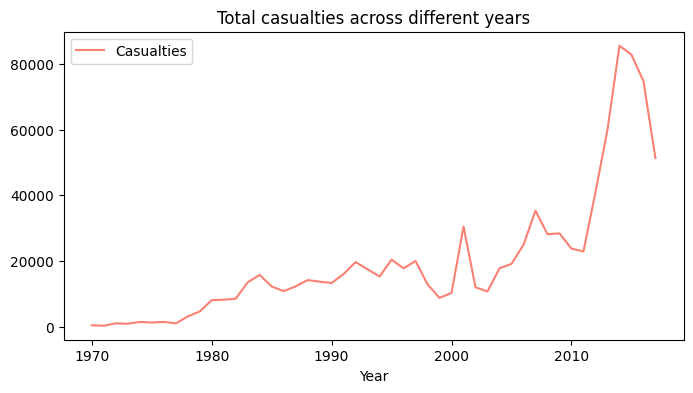

In [ ]:
yc= df[['Year','Casualties']].groupby('Year').sum()
yc.plot(color='salmon',figsize=(8,4),title='Total casualties across different years')
plt.show()

## 4.Types of Attacks and the Nationalities attacked the most.

In [ ]:
#different types of attack occured
wtdf= df['AttackType'].value_counts().head(9)
wtdf

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [ ]:
#no of people killed according to different types of attacks
attdf= df[['AttackType','Killed']].groupby('AttackType').sum().head(9)
attdf

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


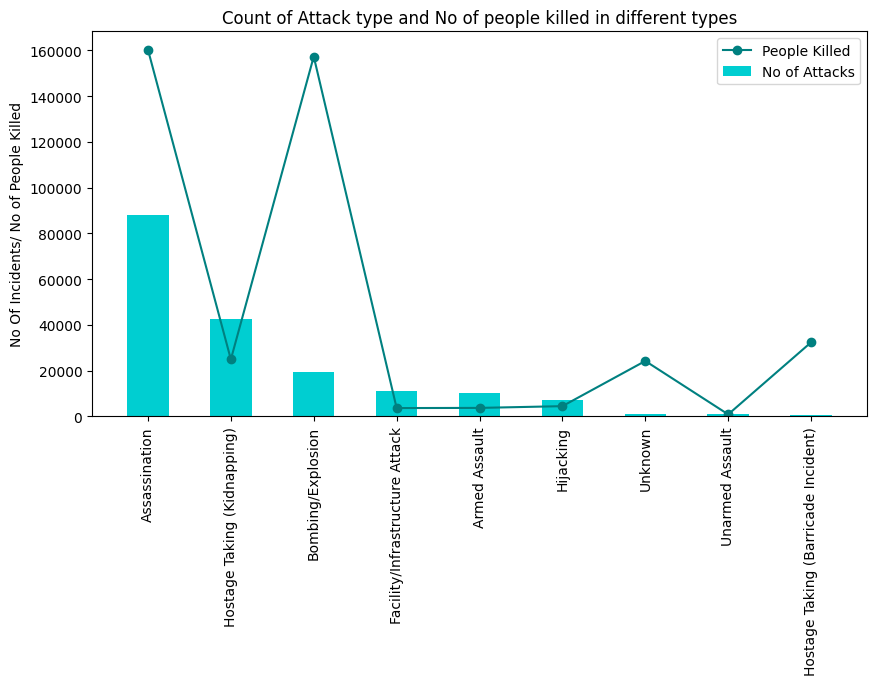

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
labels = ['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'] # Some labels for the x-axis

ax.plot(labels,attdf,color='teal',marker="o" , label="People Killed")
ax.bar(labels,wtdf,color='darkturquoise',width=0.5, label="No of Attacks")
plt.xticks(rotation=90)
#ax.set_xlabel("") # Set the label of the x-axis
ax.set_ylabel("No Of Incidents/ No of People Killed") # Set the label of the y-axis
ax.set_title("Count of Attack type and No of people killed in different types") # Set the title of the subplot
ax.legend() # Show the legend
plt.show()

In [ ]:
nt_df =df['Nationality'].value_counts().to_frame().reset_index().rename(columns={'index':'Nationalities','Nationality':'No of people targeted'}).set_index('Nationalities')
nt_df.head(10)

,No of people targeted
Nationalities,
Iraq,24113
Pakistan,13900
India,12098
Afghanistan,10931
Colombia,7922
Philippines,6685
Peru,5840
El Salvador,5212
United States,5065


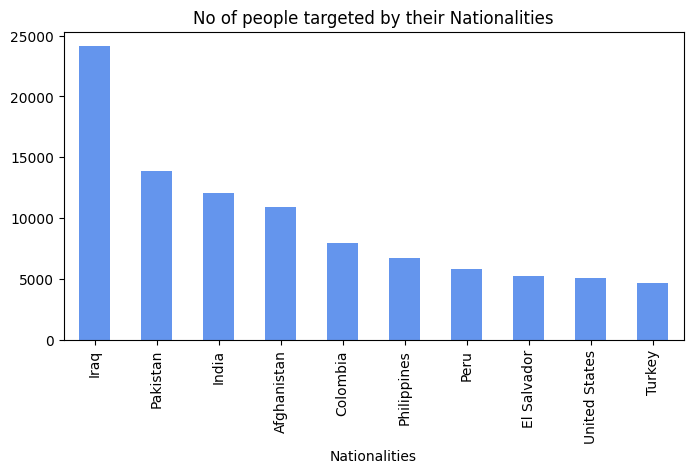

In [ ]:
nt_df.head(10).plot(kind='bar',color='cornflowerblue',figsize=(8,4),title="No of people targeted by their Nationalities", legend=None)
plt.show()

## 5. Groups that made most no of attacks and the Intensities of Damaged Properties.

In [ ]:
gp_df= df['Group Name'][df['Group Name']!='Unknown'].value_counts().to_frame().reset_index().rename(columns={'index':'Group Name','Group Name':'No Of Attacks'}).set_index('Group Name')
gp_df.head(10)

,No Of Attacks
Group Name,
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


In [ ]:
gp_df.head(10).plot(kind='bar',color='darkorange',legend=None)
plt.show()

In [ ]:
# Max no of people killed in any attack by a group and the associated country in which attack occured.
df[['Group Name','Killed','Country']][df['Killed']== df['Killed'].max()].set_index('Group Name')

,Killed,Country
Group Name,,
Islamic State of Iraq and the Levant (ISIL),1570,Iraq


In [ ]:
df.drop([73126],inplace=True)

In [ ]:
# Max no of casualties in any attack by a group and the associated country in which attack occured.
df[['Group Name','Casualties','Country']][df['Casualties']== df['Casualties'].max()].set_index('Group Name')

,Casualties,Country
Group Name,,
Al-Qaida,9574,United States


In [ ]:
df['PropertyDamaged'].value_counts().to_frame().reset_index().rename(columns={'index':'PropertyDamaged','PropertyDamaged':'Counts'})

,PropertyDamaged,Counts
0,0,117626
1,Minor (likely < $1 million),43304
2,0,19846
3,Major (likely >= $1 million but < $1 billion),909
4,Catastrophic (likely >= $1 billion),5


In [ ]:
catas_df = df[['Year','Country','city','AttackType','Group Name','PropertyDamaged','Casualties']][df['PropertyDamaged']== 'Catastrophic (likely >= $1 billion)']
catas_df

,Year,Country,city,AttackType,Group Name,PropertyDamaged,Casualties
50996,1992,United Kingdom,London,Bombing/Explosion,Irish Republican Army (IRA),Catastrophic (likely >= $1 billion),93
62651,1996,United Kingdom,Manchester,Bombing/Explosion,Irish Republican Army (IRA),Catastrophic (likely >= $1 billion),200
73127,2001,United States,New York City,Hijacking,Al-Qaida,Catastrophic (likely >= $1 billion),9574
73128,2001,United States,Arlington,Hijacking,Al-Qaida,Catastrophic (likely >= $1 billion),296
73129,2001,United States,Shanksville,Hijacking,Al-Qaida,Catastrophic (likely >= $1 billion),50


•	which region, country ,city has the highest atack
•	which year has highest and lowest atack
•	what types of attack were carried mostly
•	which nationality people were the most casualties
•	which group has highest no of atacks
•	which group has highest kill in which country
•	which group has highest casualties in which country
•	which attack had most property damages
* which type of target was mostly attacked
* what type of weapon were mostly used





## 6. Which types of Target and Weapons was mostly selected.

In [ ]:
tt_df = df['TargetType'][df['TargetType']!='Unknown'].value_counts().to_frame().reset_index().rename(columns={'index':'TargetType','TargetType':'Counts'}).set_index('TargetType')
tt_df.head(10)

,Counts
TargetType,
Private Citizens & Property,43510
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Religious Figures/Institutions,4440
Educational Institution,4322


In [ ]:
df['Weapon Type'][df['Weapon Type']!='Unknown'].value_counts().head(10)

Explosive                                                 20925
Automatic firearm                                         12419
Pistol                                                     4472
Incendiary                                                 4153
Firearm                                                    4053
Unknown firearms were used in the attack.                  4030
A roadside bomb was used in the attack.                    3616
An improvised explosive device was used in the attack.     3023
Unknown explosives were used in the attack.                1072
Mortars were used in the attack.                            849
Name: Weapon Type, dtype: int64

# **Conclusion**